In [1]:
from dataclasses import dataclass
import cv2
from PIL import Image
from PIL import ImageEnhance
from numpy.ma import array
import numpy as np
import os
from typing_extensions import dataclass_transform
# 指明被遍历的文件夹
data_train = 'Alzheimer_s Dataset/train'
def operate(currentPath, filename, targetPath):
    # 读取图像
    image = Image.open(currentPath)
    image_cv = cv2.imread(currentPath)
    # image.show()
    # x左方向的平移 xl_
    # 平移矩阵[[1,0,-10]，[0,1,-12]]
    # image.show()
    w = image.width
    h = image.height
    M = np.array([[1, 0, 80], [0, 1, 0]], dtype=np.float32)
    image_cv_change = cv2.warpAffine(image_cv, M, (w, h))
    image_cv_change_RGB = cv2.cvtColor(image_cv_change, cv2.COLOR_BGR2RGB)
    image_cv_change = Image.fromarray(image_cv_change_RGB)
    # image_cv_change.show()
    image_cv_change.save(targetPath+filename)  # 保存
for parent, dirnames, filenames in os.walk(data_train):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/数据增强-train/x右方向平移/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)



from dataclasses import dataclass
import cv2
from PIL import Image
from PIL import ImageEnhance
from numpy.ma import array
import numpy as np
import os
from typing_extensions import dataclass_transform
# 指明被遍历的文件夹
data_test = 'Alzheimer_s Dataset/test' 
def operate(currentPath, filename, targetPath):
    # 读取图像
    image = Image.open(currentPath)
    image_cv = cv2.imread(currentPath)
    # image.show()
    # x左方向的平移 xl_
    # 平移矩阵[[1,0,-10]，[0,1,-12]]
    # image.show()
    w = image.width
    h = image.height
    M = np.array([[1, 0, 80], [0, 1, 0]], dtype=np.float32)
    image_cv_change = cv2.warpAffine(image_cv, M, (w, h))
    image_cv_change_RGB = cv2.cvtColor(image_cv_change, cv2.COLOR_BGR2RGB)
    image_cv_change = Image.fromarray(image_cv_change_RGB)
    # image_cv_change.show()
    image_cv_change.save(targetPath+filename)  # 保存
for parent, dirnames, filenames in os.walk(data_test):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/数据增强-test/x右方向平移/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)

filename is: mildDem0.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem0.jpg
filename is: mildDem1.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem1.jpg
filename is: mildDem10.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem10.jpg
filename is: mildDem100.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem100.jpg
filename is: mildDem101.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem101.jpg
filename is: mildDem102.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem102.jpg
filename is: mildDem103.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem103.jpg
filename is: mildDem104.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem104.jpg
filename is: mildDem105.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem105.jpg
filename is: mildDem106.jpg
the full n

In [2]:
train_root  = "Alzheimer_s Dataset/数据增强-train/x右方向平移"
test_root = "Alzheimer_s Dataset/数据增强-test/x右方向平移"

In [3]:
batch_size = 5

from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


4


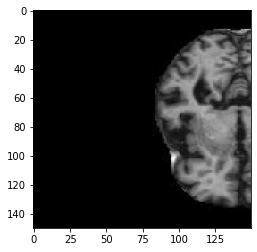

In [4]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][0]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=100)

Epoch 1/100
1025/1025 [==============================] - 87s 85ms/step - loss: 1.6829 - accuracy: 0.4739
Epoch 2/100
1025/1025 [==============================] - 91s 89ms/step - loss: 1.0780 - accuracy: 0.4870
Epoch 3/100
1025/1025 [==============================] - 87s 85ms/step - loss: 1.0678 - accuracy: 0.4853
Epoch 4/100
1025/1025 [==============================] - 84s 82ms/step - loss: 1.0496 - accuracy: 0.4950
Epoch 5/100
1025/1025 [==============================] - 93s 91ms/step - loss: 1.0462 - accuracy: 0.4952
Epoch 6/100
1025/1025 [==============================] - 95s 93ms/step - loss: 1.0763 - accuracy: 0.4966
Epoch 7/100
1025/1025 [==============================] - 91s 89ms/step - loss: 1.0503 - accuracy: 0.4989
Epoch 8/100
1025/1025 [==============================] - 91s 88ms/step - loss: 1.0559 - accuracy: 0.4997
Epoch 9/100
1025/1025 [==============================] - 91s 89ms/step - loss: 1.0495 - accuracy: 0.4987
Epoch 10/100
1025/1025 [==============================]

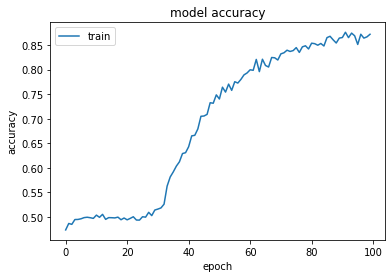

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

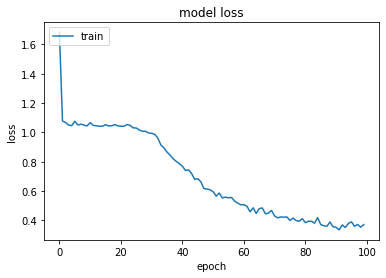

In [8]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

256/256 [==============================] - 5s 21ms/step


<AxesSubplot:>

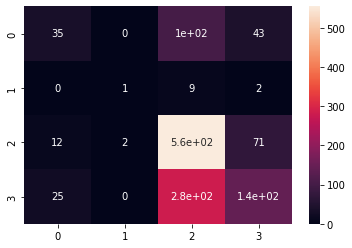

In [9]:
import seaborn as sns
import numpy as np 
predict_x = model.predict(test_data) 
pred=np.argmax(predict_x,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

In [10]:
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.028146989835809225


In [11]:
from keras.models import Model


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[10][0][0].reshape(1,150,150,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

1/1 [==============================] - 0s 111ms/step


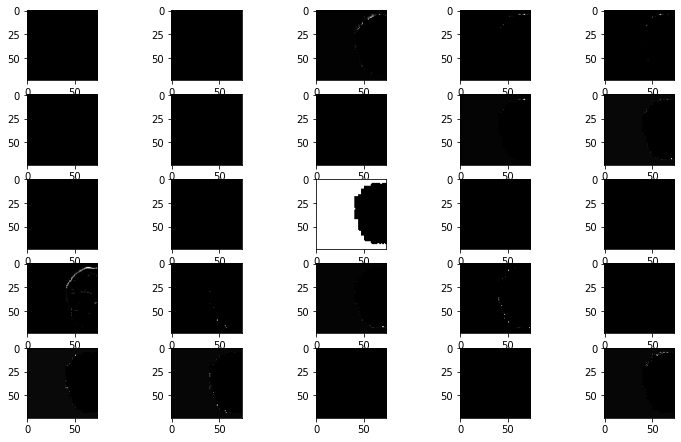

In [12]:
display_activation(activations, 5, 5, 1)